In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
import cufflinks as cf

In [10]:
cf.go_offline()

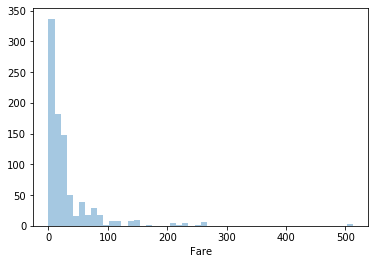

In [15]:
sns.distplot(train['Fare'],bins=50,kde=False)

(889.5, -0.5)

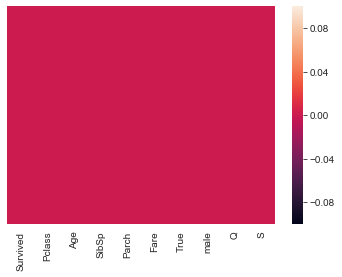

In [139]:
ax=sns.heatmap(train.isnull(),yticklabels=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

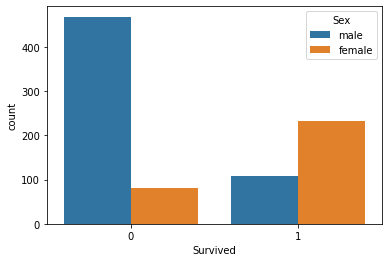

In [20]:
sns.countplot(x='Survived',data=train,hue='Sex')

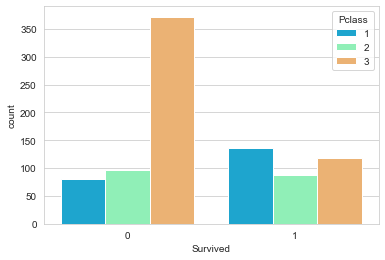

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

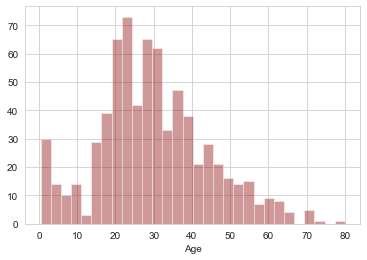

In [30]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

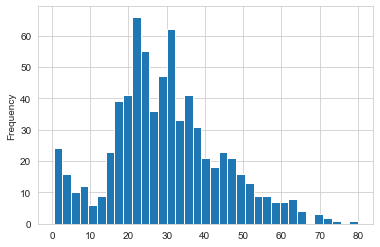

In [31]:
train['Age'].plot.hist(bins=35)

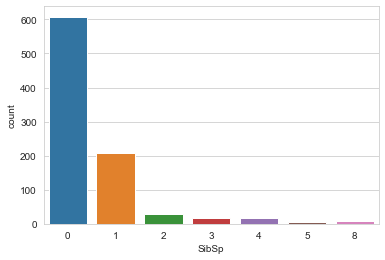

In [42]:
sns.countplot('SibSp',data=train)

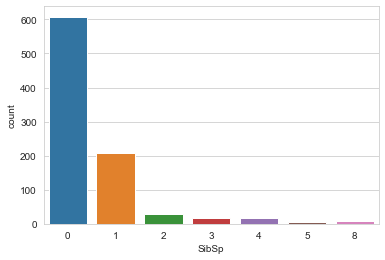

In [40]:
sns.countplot(x='SibSp',data=train)

In [33]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

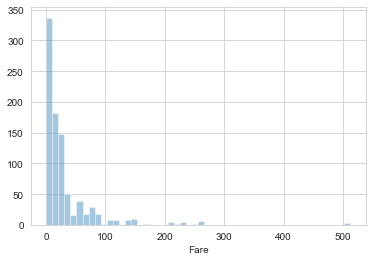

In [45]:
sns.distplot(train['Fare'],bins=50,kde=False)

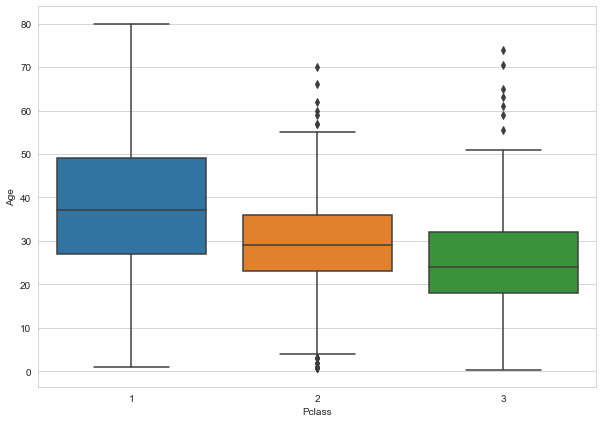

In [49]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [94]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 24
    else:
        return Age
            
        
        


In [95]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

(889.5, -0.5)

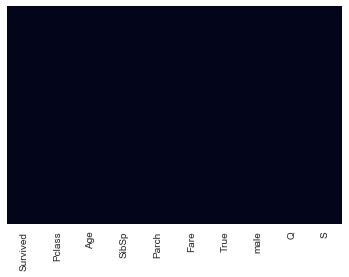

In [125]:
ax=sns.heatmap(train.isnull(),yticklabels=False,cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [97]:
train['Has_Cabin']=train['Cabin'].isnull()

In [98]:
train.drop('Cabin',inplace=True,axis=1)

In [99]:
train.dropna(inplace=True)
train.reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,True
885,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,False
886,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,True
887,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,False


In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
Has_Cabin      889 non-null bool
True           889 non-null uint8
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: bool(1), float64(2), int64(5), object(4), uint8(4)
memory usage: 87.7+ KB


In [101]:
def Cabnum(col):
    if pd.isnull(col):
        return 1
    else:
        return 0


In [102]:
cabin=pd.get_dummies(train['Has_Cabin'],drop_first=True)

In [103]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [104]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [105]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [106]:
train=pd.concat([train,cabin,sex,embark],axis=1)

In [117]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,True,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,True,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,1,1,0,1


In [119]:
train.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',    'Embarked',   'Has_Cabin',
                True,        'male',           'Q',           'S'],
      dtype='object')

In [121]:
train.drop(['Embarked','Sex','Has_Cabin','Name','Ticket'],axis=1,inplace=True)

In [123]:
train.drop('PassengerId',axis=1,inplace=True)

In [124]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,True,male,Q,S
0,0,3,22.0,1,0,7.2500,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [127]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
model=LogisticRegression()

In [132]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
prediction = model.predict(X_test)

In [134]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       163
           1       0.81      0.67      0.74       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [136]:
from sklearn.metrics import confusion_matrix

In [138]:
print(confusion_matrix(y_test,prediction))

[[147  16]
 [ 34  70]]
